In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,3.0,1.0,NaN,1.0,NaN,2.0,NaN,NaN,1
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,NaN,NaN,1.0,3.0,2.0,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1
679,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
680,5.0,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3
681,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	16
float64		column 2	32
float64		column 3	114
float64		column 4	32
float64		column 5	130
float64		column 6	50
float64		column 7	114
float64		column 8	96
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,667.000000,651.000000,569.000000,651.000000,553.00000,633.000000,569.000000,587.000000,683.000000
mean,4.454273,3.136713,3.063269,2.814132,3.15009,3.472354,3.351494,2.814310,1.603221
std,2.818684,3.060124,2.859911,2.849699,2.14786,3.598472,2.422642,3.014968,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.00000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.00000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.00000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

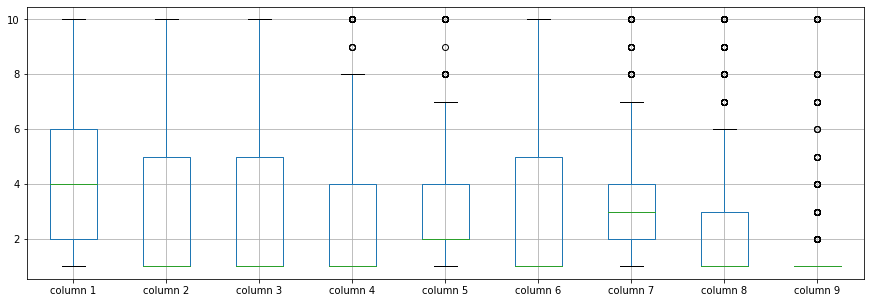

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.454273
column 2    3.136713
column 3    3.063269
column 4    2.814132
column 5    3.150090
column 6    3.472354
column 7    3.351494
column 8    2.814310
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.640735,0.639831,0.488354,0.473437,0.583012,0.529970,0.500831,0.352150
column 2,0.640735,1.000000,0.897177,0.700137,0.721937,0.687497,0.743285,0.698543,0.462710
column 3,0.639831,0.897177,1.000000,0.681417,0.703099,0.724484,0.712545,0.707934,0.440917
column 4,0.488354,0.700137,0.681417,1.000000,0.576516,0.659171,0.657356,0.577339,0.419601
column 5,0.473437,0.721937,0.703099,0.576516,1.000000,0.587238,0.581860,0.613909,0.466564
column 6,0.583012,0.687497,0.724484,0.659171,0.587238,1.000000,0.687223,0.587922,0.334037
column 7,0.529970,0.743285,0.712545,0.657356,0.581860,0.687223,1.000000,0.621055,0.326564
column 8,0.500831,0.698543,0.707934,0.577339,0.613909,0.587922,0.621055,1.000000,0.409526
column 9,0.352150,0.462710,0.440917,0.419601,0.466564,0.334037,0.326564,0.409526,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+43,9+43+43,9+43+43,9+43+43+43+43,9+43+43+43,9+43+43,9+43,9], vae_layer = False, seed = 430)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 32.89899494534447
Epoch: 1 , loss: 32.702201979500906
Epoch: 2 , loss: 32.72758143288748
Epoch: 3 , loss: 32.45537798745291
Epoch: 4 , loss: 31.29808861868722
Epoch: 5 , loss: 28.463875407264347
Epoch: 6 , loss: 27.842758678254626
Epoch: 7 , loss: 27.39296631585984
Epoch: 8 , loss: 27.115198498680478
Epoch: 9 , loss: 26.422992683592298
Epoch: 10 , loss: 26.496023314339773
Epoch: 11 , loss: 26.136813890366327
Epoch: 12 , loss: 25.423336687542143
Epoch: 13 , loss: 25.132288614908855
Epoch: 14 , loss: 24.844818592071533
Epoch: 15 , loss: 24.08052008492606
Epoch: 16 , loss: 23.203668844132196
Epoch: 17 , loss: 23.333126794724237
Epoch: 18 , loss: 22.96785425004505
Epoch: 19 , loss: 22.807485398792085
Epoch: 20 , loss: 22.90269983382452
Epoch: 21 , loss: 22.787134193238757
Epoch: 22 , loss: 22.900696254911878
Epoch: 23 , loss: 23.135812282562256
Epoch: 24 , loss: 21.9523898987543
Epoch: 25 , loss: 22.3175294

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,-0.674396,0.0,-1.610696,0.000000,-2.628299,-0.704758,0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
4,-0.114442,1.992836,0.000000,0.0,0.000000,2.181963,0.002069,0.000000,0
...,...,...,...,...,...,...,...,...,...
678,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
679,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
680,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
681,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(79.4929918584895, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.23706026652331644

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.000000,1.000000,1.000000,1.0,2.000000,1.000000,3.000000,1.000000,1
1,5.000000,4.000000,4.000000,5.0,7.000000,10.000000,3.000000,2.000000,1
2,3.000000,1.000000,0.325604,1.0,0.389304,2.000000,0.371701,0.295242,1
3,6.000000,8.000000,8.000000,1.0,3.000000,4.000000,3.000000,7.000000,1
4,3.885558,2.992836,1.000000,3.0,2.000000,3.181963,3.002069,1.000000,1
...,...,...,...,...,...,...,...,...,...
678,3.000000,1.000000,1.000000,1.0,2.000000,1.000000,2.000000,1.000000,1
679,2.000000,1.000000,1.000000,1.0,2.000000,1.000000,3.000000,1.000000,1
680,5.000000,10.000000,10.000000,10.0,4.000000,10.000000,5.000000,6.000000,3
681,1.000000,1.000000,1.000000,3.0,2.000000,1.000000,1.000000,1.000000,1


In [20]:
imputations[-1].to_excel("BCW_AE_10(imp).xlsx", index=False, header=False)